In [35]:
import os
import json
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from shapely.geometry import box
from shapely.affinity import rotate, translate

In [36]:
def visualize_2d(objects_json, room_dimensions=(12, 10, 3), save_path=None):
    room_length, room_width, _ = room_dimensions

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal', adjustable='box')

    # Add title and labels
    title_str = f"2D Room Layout: {room_length} × {room_width} m"
    ax.set_title(title_str, fontsize=14, pad=40)
    ax.set_xlabel("X (meters)", fontsize=12)
    ax.set_ylabel("Y (meters)", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.4)

    # Draw room boundary
    room_rect = patches.Rectangle(
        (0, 0), 
        width=room_length, height=room_width,
        linewidth=2, linestyle='--',
        edgecolor='black', facecolor='none'
    )
    ax.add_patch(room_rect)

    # Set margins
    margin = 1.0
    ax.set_xlim(-margin, room_length + margin)
    ax.set_ylim(-margin, room_width + margin)

    polygons = []
    names = []
    overlapping_pairs = []

    # Draw each object
    for obj in objects_json.get("objects", []):
        name = obj.get("name", "Unnamed")
        size = obj.get("size", {})
        pos = obj.get("position", {})
        rot = obj.get("rotation", {})

        length = size.get("length", 1.0)
        width_ = size.get("width", 1.0)
        x_center = pos.get("x", 0.0)
        y_center = pos.get("y", 0.0)
        yaw_deg = rot.get("yaw", 0.0)

        # Create and transform rectangle
        rect = box(-length/2, -width_/2, length/2, width_/2)
        rotated_rect = rotate(rect, angle=yaw_deg, origin=(0,0), use_radians=False)
        final_rect = translate(rotated_rect, xoff=x_center, yoff=y_center)

        polygons.append(final_rect)
        names.append(name)

        # Add the object patch to the plot
        coords = np.array(final_rect.exterior.coords)
        patch = patches.Polygon(
            coords,
            closed=True,
            edgecolor='blue',
            facecolor='skyblue',
            alpha=0.4,
            linewidth=2
        )
        ax.add_patch(patch)

        # Compute centroid for label placement
        centroid = final_rect.centroid
        offset_dist = 0.0  # Adjust if needed
        theta_rad = math.radians(yaw_deg)
        label_dx = offset_dist * -math.sin(theta_rad)
        label_dy = offset_dist * math.cos(theta_rad)

        label_x = centroid.x + label_dx
        label_y = centroid.y + label_dy

        ax.text(
            label_x, label_y,
            name,
            ha='center', va='center',
            fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
            rotation=yaw_deg,
            rotation_mode='anchor'
        )

    # Check for overlapping objects
    for i in range(len(polygons)):
        for j in range(i + 1, len(polygons)):
            if polygons[i].intersects(polygons[j]):
                overlapping_pairs.append((names[i], names[j]))

    # Label room walls
    ax.text(room_length / 2, room_width + margin * 0.4, "NORTH WALL", ha='center', va='bottom', fontsize=11, fontweight='bold')
    ax.text(room_length / 2, -margin * 0.4, "SOUTH WALL", ha='center', va='top', fontsize=11, fontweight='bold')
    ax.text(-margin * 0.4, room_width / 2, "WEST WALL", ha='center', va='center', fontsize=11, fontweight='bold', rotation=90)
    ax.text(room_length + margin * 0.4, room_width / 2, "EAST WALL", ha='center', va='center', fontsize=11, fontweight='bold', rotation=-90)

    # Display object count
    object_count = len(objects_json.get("objects", []))
    ax.text(room_length/2, room_width + margin*1.2, f"{object_count} Object(s)", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()

    # Print overlapping info
    if overlapping_pairs:
        print("Overlapping objects detected:")
        for pair in overlapping_pairs:
            print(f" - {pair[0]} overlaps with {pair[1]}")
    else:
        print("No overlapping objects detected.")

    # Save the figure if a save path is provided; otherwise, show it.
    if save_path:
        plt.savefig(save_path)
        print(f"Saved plot to {save_path}")
        plt.close(fig)
    else:
        plt.show()

In [94]:
json_object = {
  "objects": [
    {
      "name": "Sofa",
      "size": {
        "length": 1.5,
        "width": 1.0
      },
      "position": {
        "x": 1,
        "y": 2
      }
    },
    {
      "name": "Coffee Table",
      "size": {
        "length": 1.2,
        "width": 0.8
      },
      "position": {
        "x": 6,
        "y": 3
      }
    },
    {
      "name": "Display Cabinets",
      "size": {
        "length": 0.4,
        "width": 0.3
      },
      "position": {
        "x": 3,
        "y": 4
      }
    },
    {
      "name": "Side Tables",
      "size": {
        "length": 0.5,
        "width": 0.4
      },
      "position": {
        "x": 7,
        "y": 4
      }
    },
    {
      "name": "Console Tables",
      "size": {
        "length": 1.0,
        "width": 0.6
      },
      "position": {
        "x": 4,
        "y": 6
      }
    },
    {
      "name": "Accent Chairs",
      "size": {
        "length": 0.6,
        "width": 0.4
      },
      "position": {
        "x": 2,
        "y": 5
      }
    },
    {
      "name": "TV Stand",
      "size": {
        "length": 1.3,
        "width": 0.9
      },
      "position": {
        "x": 8,
        "y": 1
      }
    },
    {
      "name": "Bar Cart",
      "size": {
        "length": 0.7,
        "width": 0.5
      },
      "position": {
        "x": 9,
        "y": 7
      }
    }
  ]
}

No overlapping objects detected.


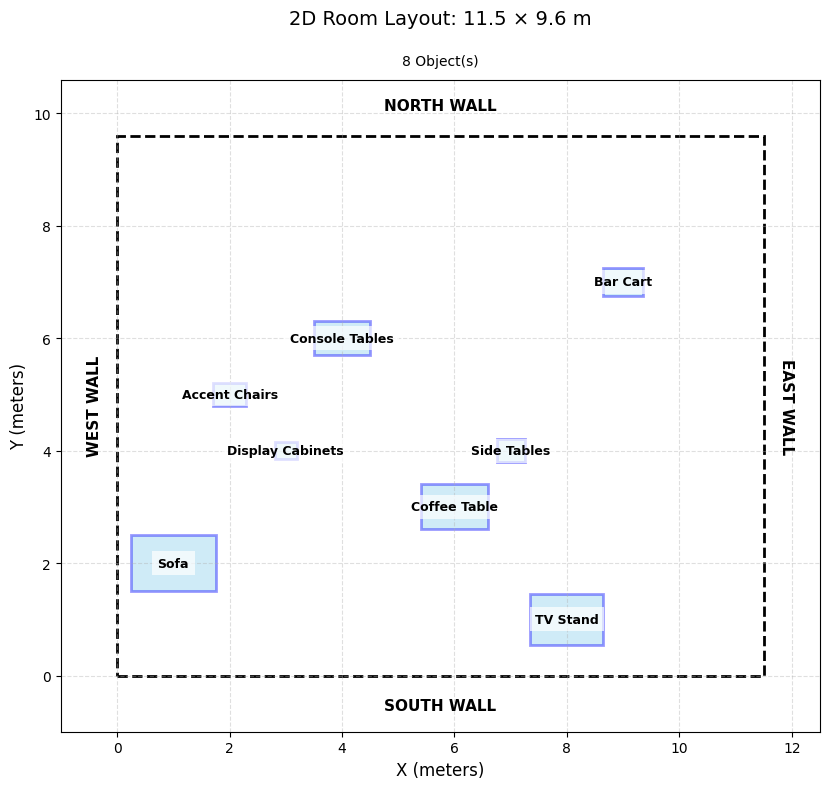

In [95]:
room_dimensions = (11.5, 9.6, 3.0)
visualize_2d(json_object, room_dimensions)